In [443]:
import numpy as np
import pandas as pd

In [444]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Prep

In [445]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [446]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [447]:
list(df.dtypes[df.dtypes == 'int64'].index)

['SeniorCitizen', 'tenure']

In [448]:
# Standardize cols and col string data

df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [449]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [450]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [451]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [452]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [162]:
pd.to_numeric?

Signature:
pd.to_numeric(
    arg,
    errors: 'DateTimeErrorChoices' = 'raise',
    downcast: "Literal['integer', 'signed', 'unsigned', 'float'] | None" = None,
    dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>,
)
Docstring:
Convert argument to a numeric type.

The default return dtype is `float64` or `int64`
depending on the data supplied. Use the `downcast` parameter
to obtain other dtypes.

Please note that precision loss may occur if really large numbers
are passed in. Due to the internal limitations of `ndarray`, if
numbers smaller than `-9223372036854775808` (np.iinfo(np.int64).min)
or larger than `18446744073709551615` (np.iinfo(np.uint64).max) are
passed in, it is very likely they will be converted to float so that
they can be stored in an `ndarray`. These warnings apply similarly to
`Series` since it internally leverages `ndarray`.

Parameters
----------
arg : scalar, list, tuple, 1-d array, or Series
    Argument to be converted.
errors : {'ignore', 'raise', '

In [453]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [454]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [455]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [456]:
# Check on churn var


In [457]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [458]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [459]:
df.churn = (df.churn == 'yes').astype(int)

# 3.3 Setup val framework

In [460]:
# With Sci-kit learn

In [461]:
from sklearn.model_selection import train_test_split

In [462]:
train_test_split?


Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [463]:
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=20/80, random_state=1)
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [464]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [465]:
# Already shuffled.

In [466]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [467]:
y_train = df_train.pop('churn')
y_val = df_val.pop('churn')
y_test = df_test.pop('churn')
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

# 3.4 EDA

In [468]:
df_full_train = df_full_train.reset_index(drop=True)

In [469]:
# check for missing values

In [470]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [471]:
# look at target variables.. 

In [472]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [473]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [474]:
# Mean also provides the churn rate .. as it is binary result

In [475]:
round(df_full_train.churn.mean(), 2)

np.float64(0.27)

```
=> 27% is the Churn rate. 
```

In [476]:
# numeric and categorical anaylysis

In [477]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [478]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [479]:
categorical = [col for col in df_full_train.columns if col not in numerical and col != 'churn']
categorical

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [480]:
df_full_train[categorical].nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

In [481]:
categorical.remove('customerid')

df_full_train[categorical].nunique()

# 3.5 Feature importance (categorical)

### Churn rate

In [484]:
# Find churn rate for male/female  

In [485]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [486]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male, churn_female

(np.float64(0.2632135306553911), np.float64(0.27682403433476394))

In [487]:
churn_global = df_full_train.churn.mean()
churn_global

np.float64(0.26996805111821087)

In [488]:
# With partner and not

In [489]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner, churn_no_partner

(np.float64(0.20503330866025166), np.float64(0.3298090040927694))

In [490]:
churn_global - churn_partner

np.float64(0.06493474245795922)

In [491]:
churn_global - churn_no_partner

np.float64(-0.05984095297455855)

In [492]:
# => Determines feature importance (global vs group)

```
1. Difference
    global - group 
        < 0 : more likely to churn
        > 0 : less likely to churn
```

In [493]:
# Risk Ratio

In [494]:
churn_no_partner / churn_global


np.float64(1.2216593879412643)

In [495]:
churn_partner / churn_global


np.float64(0.7594724924338315)

In [496]:
churn_no_partner / churn_global


np.float64(1.2216593879412643)

```
2. Risk Ratio
    group / global
        > 1 : more likely to churn
        < 1 : less likely to churn
```

In [497]:
# -> Risk Ratio provides a subgroup how important it is.

In [498]:
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = churn_global - df_group['mean']
    df_group['risk'] = df_group['mean'] / churn_global
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,0.027698,0.897403
1,0.413377,912,-0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,-0.059841,1.221659
yes,0.205033,2702,0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,-0.043792,1.162212
yes,0.165666,1666,0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,0.028652,0.893870
yes,0.273049,5087,-0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,0.012561,0.953474
no_phone_service,0.241316,547,0.028652,0.893870
yes,0.290742,2387,-0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,0.077621,0.712482
fiber_optic,0.425171,2479,-0.155203,1.574895
no,0.077805,1221,0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,-0.150953,1.559152
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.153226,1612,0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,-0.134355,1.497672
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.217232,1915,0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,-0.125907,1.466379
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.230412,1940,0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,-0.148946,1.551717
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.159926,1632,0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,-0.072864,1.269897
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.302723,2167,-0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,-0.068938,1.255358
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.307273,2200,-0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,-0.161733,1.599082
one_year,0.120573,1186,0.149395,0.446621
two_year,0.028274,1344,0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,0.097897,0.637375
yes,0.338151,3321,-0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.105630,0.608733
electronic_check,0.455890,1893,-0.185922,1.688682
mailed_check,0.193870,1305,0.076098,0.718121


# 3.6 Mutual Information

In [499]:
from sklearn.metrics import mutual_info_score

In [500]:
mutual_info_score?

Signature: mutual_info_score(labels_true, labels_pred, *, contingency=None)
Docstring:
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels
of the same data. Where :math:`|U_i|` is the number of the samples
in cluster :math:`U_i` and :math:`|V_j|` is the number of the
samples in cluster :math:`V_j`, the Mutual Information
between clusterings :math:`U` and :math:`V` is given as:

.. math::

    MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
    \log\frac{N|U_i \cap V_j|}{|U_i||V_j|}

This metric is independent of the absolute values of the labels:
a permutation of the class or cluster label values won't change the
score value in any way.

This metric is furthermore symmetric: switching :math:`U` (i.e
``label_true``) with :math:`V` (i.e. ``label_pred``) will return the
same score value. This can be useful to measure the agreement of two
independent label assignments strategies on the same dataset when the

In [501]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [502]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

np.float64(0.0001174846211139946)

In [503]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

np.float64(0.009967689095399745)

In [504]:
pd.DataFrame.apply?

Signature:
pd.DataFrame.apply(
    self,
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None,
    args=(),
    by_row: "Literal[False, 'compat']" = 'compat',
    engine: "Literal['python', 'numba']" = 'python',
    engine_kwargs: 'dict[str, bool] | None' = None,
    **kwargs,
)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns

In [505]:
# Since apply works for a single argument.
def mi_score_against_churn(series_col):
    return mutual_info_score(series_col, df_full_train.churn)

In [506]:
# Let us apply for the df with categorical
mi_scores = df_full_train[categorical].apply(mi_score_against_churn)
mi_scores.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Correlation coefficient (For numerical values)

```
Denoted by r . lies b/w -1 and 1 

Negative: if x grows, y falls.
Positive: if x grows, y also grows. 

0 - 0.2 (LOW)
.2 - .6 (MODERATE)
.6 - 1  (HIGH)
```

In our case : $$ y e {0, 1} 
                x e R $$

In [507]:
df_full_train.tenure.max()

np.int64(72)

In [508]:
# x : 0 -> 72
# y : {0, 1}

In [509]:
# 

In [510]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [511]:
# Tenure -> Negative correlation 


pl_arr = np.zeros(3)
pl_arr[0] = df_full_train[df_full_train.tenure <= 2].churn.mean()
pl_arr[1] = df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()
pl_arr[2] = df_full_train[df_full_train.tenure > 12].churn.mean()
pl_arr

array([0.59534207, 0.39944134, 0.17634908])

In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Tenure'}>

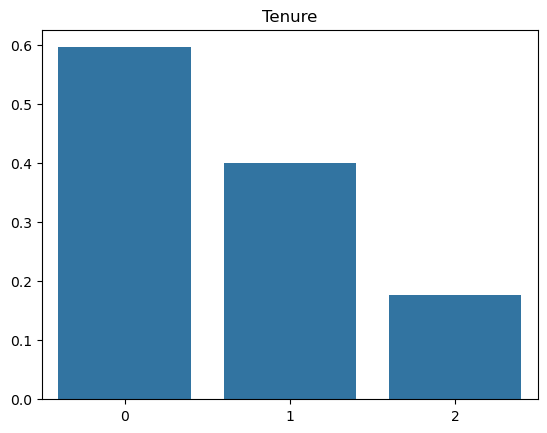

In [513]:

plt.title("Tenure")
sns.barplot(pl_arr)

In [514]:
# monthlycharges -> Positive correlation 
pl_arr = np.zeros(3)
pl_arr[0] = df_full_train[df_full_train.monthlycharges <= 20].churn.mean()
pl_arr[1] = df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()
pl_arr[2] = df_full_train[df_full_train.monthlycharges > 50].churn.mean()
pl_arr

array([0.08795411, 0.18340944, 0.32499342])

<Axes: title={'center': 'Monthly Charges'}>

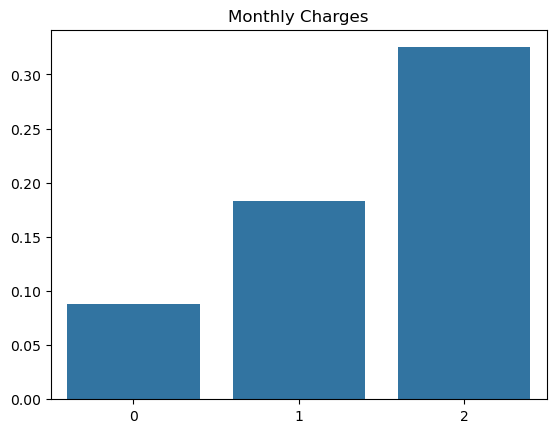

In [515]:
plt.title("Monthly Charges")
sns.barplot(pl_arr)

# 3.8 One hot encoding

In [516]:
from sklearn.feature_extraction import DictVectorizer

In [517]:
df_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [521]:
df_train[['gender', 'contract']].iloc[:5].to_dict()

{'gender': {0: 'female', 1: 'male', 2: 'female', 3: 'female', 4: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year'}}

In [522]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [523]:
dv = DictVectorizer()
dv.fit(dicts)

DictVectorizer()

In [524]:
dv.transform(dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (100, 5)>

In [525]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [526]:
# Handles any numeric in between.. so we could have a mixture of categorical and numerical values


In [527]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records') 

In [528]:
dv = DictVectorizer(sparse=False)

In [529]:
'''
Instead of 

dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

we do .. 
'''
X_train = dv.fit_transform(train_dicts)


In [530]:
list(X_train[0])

[np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(115.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(72.0),
 np.float64(8425.15)]

In [531]:
# Validation dataset (only transform)

In [532]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [533]:
X_val = dv.transform(val_dicts)

In [534]:
X_train.shape, X_val.shape

((4225, 45), (1409, 45))

# 3.9 Logistic Regression

In [535]:
# LR solves binary classification

$$ y_i \e {0, 1 $$ 

In [536]:
# probability of x_i belonging to y

$$ g(x_i) = SIGMOID (w_0 + W.T x_i) $$

In [537]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [538]:
z = np.linspace(-7, 7, 50)

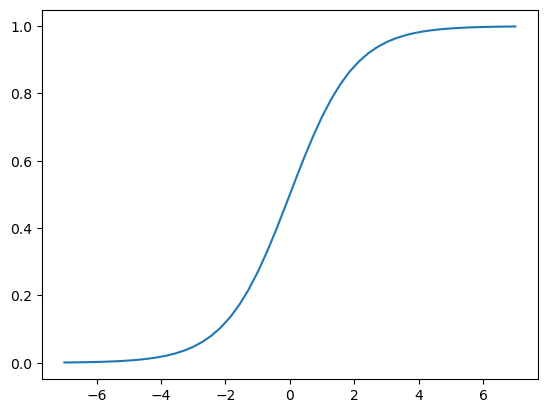

In [539]:
plt.plot(z, sigmoid(z))

In [540]:
def linear_regression(xi):
    result = w0 

    for j in range(len(w)):
        result += xi[j] * w[j]

    return result

In [541]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score += xi[j] * w[j]

    result = sigmoid(score)
    return resutl

In [542]:
# Both linear regression and logistic regression are linear models ( coz they use the dot product during training ) .. are faster to train. 

In [543]:
# 3.10 Training LR 

In [544]:
from sklearn.linear_model import LogisticRegression

In [545]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/Caskroom/mambaforge/base/envs/mlzc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [546]:
model.intercept_ # bias

array([-0.10908643])

In [547]:
model.coef_  # weights

array([[ 4.75331826e-01, -1.74879825e-01, -4.08179929e-01,
        -2.99964498e-02, -7.77314781e-02,  6.26454462e-02,
        -8.90871463e-02, -8.12862277e-02, -3.43033689e-02,
        -7.34245589e-02, -3.35271862e-01,  3.16631080e-01,
        -8.90871463e-02,  3.66465636e-03, -2.58175041e-01,
         1.41749326e-01,  8.69778675e-03,  6.25113362e-02,
        -8.90871463e-02, -8.11521177e-02,  2.65526928e-01,
        -8.90871463e-02, -2.84167709e-01, -2.30999715e-01,
         1.23271787e-01, -1.66305348e-01,  5.85774198e-02,
        -8.70256882e-02, -3.19803201e-02,  7.00847245e-02,
        -5.88066441e-02,  1.41749326e-01, -2.49477254e-01,
         2.15523383e-01, -1.20433550e-01, -8.90871463e-02,
         1.01792768e-01, -7.09178204e-02, -8.90871463e-02,
         5.22770389e-02,  2.13173399e-01, -8.90871463e-02,
        -2.31814181e-01, -7.04964760e-02,  3.83590600e-04]])

In [548]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [549]:
# Hard predictions

In [550]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [551]:
# Soft predictions (prob_of_negative, prob_of_positive)
model.predict_proba(X_val)

array([[0.99101541, 0.00898459],
       [0.79556135, 0.20443865],
       [0.78795865, 0.21204135],
       ...,
       [0.86372376, 0.13627624],
       [0.20050774, 0.79949226],
       [0.1628221 , 0.8371779 ]])

In [552]:
y_pred = model.predict_proba(X_val)[:, 1]

In [553]:
churn_decision = (y_pred >= 0.5)

In [554]:
np.array(y_val)

array([0, 0, 0, ..., 0, 1, 1])

In [555]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [557]:
# Find all customers to who we want to give away offers for churn pred.
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [564]:
# Obtain accuracy of the model
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [565]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [566]:
df_pred

,probability,prediction,actual
0,0.008985,0,0
1,0.204439,0,0
2,0.212041,0,0
3,0.542562,1,1
4,0.213562,0,0
...,...,...,...
1404,0.313528,0,0
1405,0.039310,0,1
1406,0.136276,0,0
1407,0.799492,1,1


In [567]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [568]:
df_pred

,probability,prediction,actual,correct
0,0.008985,0,0,True
1,0.204439,0,0,True
2,0.212041,0,0,True
3,0.542562,1,1,True
4,0.213562,0,0,True
...,...,...,...,...
1404,0.313528,0,0,True
1405,0.039310,0,1,False
1406,0.136276,0,0,True
1407,0.799492,1,1,True


In [569]:
df_pred['correct'].mean()

np.float64(0.8034066713981547)

In [570]:
# => Model is 80% correct

In [571]:
# 3.11 Model Interpretation

In [572]:
a = [1, 3, 34]
b = 'abc'
print(list(zip(a, b)))
print(dict(zip(a, b)))

[(1, 'a'), (3, 'b'), (34, 'c')]
{1: 'a', 3: 'b', 34: 'c'}


In [573]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [574]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.475),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.266),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [575]:
small = ['contract', 'tenure', 'monthlycharges']

In [576]:
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [577]:
recs = df_train[small].iloc[:10].to_dict(orient='records')
recs

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [578]:
vec = dv.fit(recs)

In [579]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')


In [581]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [582]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [583]:
X_train_small = dv_small.transform(dicts_train_small)

In [584]:
X_train_small[1]

array([ 1.  ,  0.  ,  0.  , 95.25, 10.  ])

In [585]:
# Now fit to LR model
model_small = LogisticRegression()

In [586]:
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [587]:
w0 = model_small.intercept_
w = model_small.coef_[0].round(3)

In [588]:
w0

array([-2.4779576])

In [589]:
w

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [590]:
# Join feature names with weights

dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [591]:
# Consider ( 1Month Contract, 0, 0, 50 Monthly charges, 5 years tenure)

In [592]:
sigmoid(-2.47)

np.float64(0.07798823512936635)

In [593]:
sigmoid(-2.47 + 1 * .97)

np.float64(0.18242552380635632)

In [594]:
sigmoid(-2.47 + 1 * .97 + 50 * .027)

np.float64(0.46257015465625034)

In [595]:
sigmoid(-2.47 + 1 * .97 + 50 * .027 + 5 * -.036)

np.float64(0.41824062315816374)

In [596]:
-2.47 + 1 * .97 + 50 * .027 + 5 * -.036

-0.3300000000000001

In [597]:
sigmoid(_)

np.float64(0.41824062315816374)

In [598]:
# 41% churn rate

# 3.12 Using the model

In [599]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [600]:
full_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
full_dicts[:2]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [601]:
dv = DictVectorizer(sparse=False)

In [602]:
X_full_train = dv.fit_transform(full_dicts)

In [603]:
y_full_train = df_full_train.churn.values

In [604]:
# LR

In [605]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/usr/local/Caskroom/mambaforge/base/envs/mlzc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [606]:
dicts_test = df_test[numerical + categorical].to_dict(orient='records')

In [607]:
dicts_test[:2]

[{'tenure': 41,
  'monthlycharges': 79.85,
  'totalcharges': 3320.75,
  'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)'},
 {'tenure': 66,
  'monthlycharges': 102.4,
  'totalcharges': 6471.85,
  'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'no',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)'}]

In [608]:
X_test = dv.fit_transform(dicts_test)

In [609]:
y_test_pred = model.predict_proba(X_test)[:, 1]

In [610]:
y_test_pred

array([0.05683483, 0.13000799, 0.32389974, ..., 0.00647209, 0.19170845,
       0.66189444])

In [611]:
df_test_pred = pd.DataFrame(y_test_pred, columns=['probability'])
df_test_pred

,probability
0,0.056835
1,0.130008
2,0.323900
3,0.446662
4,0.233546
...,...
1404,0.528093
1405,0.044604
1406,0.006472
1407,0.191708


In [612]:
churn_decision = (y_test_pred >= 0.5)


In [613]:
(churn_decision == y_test).mean()

np.float64(0.8119233498935415)

In [614]:
# 81.5% accurate

In [615]:
customer = dicts_test[10]
customer

{'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45,
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check'}

In [616]:
X_small = dv.transform([customer])

In [617]:
model.predict_proba(X_small)[0,1]

np.float64(0.498595130899434)

In [618]:
y_test[10]

np.int64(0)

In [619]:
customer2 = dicts_test[-1]
customer2

{'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5,
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check'}

In [620]:
X_small = dv.transform([customer2])
model.predict_proba(X_small)[0,1]

np.float64(0.6618944365737257)

In [621]:
y_test.iloc[-1]

np.int64(1)